In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Modify objective function to penalize complexity

In the linear regression examples notebook, we saw that a sufficiently flexible model can over-fit to data when there's measurement noise and a limited number of observations. 

We also saw that models that are not flexible enough can fail to capture the complexity of the ground truth model. 

There's no way to make an overly simple model become capable of capturing a complex function, so ideally we will want to start with a sufficiently flexible model and then prune it so that it's not over-fit to data.

One way to do so is to modify the objective function to include a penalty on the magnitude of parameter values. Increasing this penalty will drive the regression coefficients to zero, which reduces model complexity by mimicking a lower order polynomial (i.e. if we have a 5th order polynomial model, and the 5th regression coefficient is zero, then we effectively only have a 4th order polynomial). 

The modified objective function with the penalty is 

$$
g(\mathbf{w}) = \sum_{i = 1}^n \left( y_i - \sum_{j = 1}^m w_j x_{ij} \right)^2 + \lambda \sum_{j=1}^m w_j^2
$$

Written in vector notation, 

$$
g(\mathbf{w}) = (\mathbf{y} - \mathbf{X} \cdot \mathbf{w})^T \cdot (\mathbf{y} - \mathbf{X} \cdot \mathbf{w}) 
+ \lambda \; \mathbf{w}^T \cdot \mathbf{w}
$$

## Solve for $\mathbf{w}$ that minimizes the objective function

We want to find 

$$
\mathbf{w}^* = \underset{\mathbf{w}}{\text{argmin}}  \; g(\mathbf{w})
$$

As before, we start by computing the gradient of the objective function with respect to $\mathbf{w}$. As an exercise, try to show that this gradient is given by 

$$ \nabla_{\mathbf{w}} g (\mathbf{w}) = 
-2 \mathbf{X}^T \mathbf{y}
+
2 \mathbf{X}^T \mathbf{X} \mathbf{w}
+ 
2 \lambda \mathbf{w}
$$

Setting the gradient to zero and solving for $\mathbf{w}$ gives, 

$$
\mathbf{X}^T \mathbf{y} = 
(\mathbf{X}^T \mathbf{X} + \lambda \; \mathbb{I}_m) \mathbf{w}
$$

$$
\mathbf{w}^* = (\mathbf{X}^T \mathbf{X} + \lambda \; \mathbb{I}_m)^{-1} \mathbf{X}^T \mathbf{y} 
$$

where $\mathbb{I}_m$ is the $m \times m$ identity matrix (a matrix with ones along the diagonal and zeros everwhere else). 

## Regularized linear regression example revisited

In [2]:
# define number of observations to make
n = 10
sigma = .2

x = np.linspace(-np.pi, np.pi)
y_true = np.sin(x)

x_obs = np.linspace(-np.pi, np.pi, n)
y_obs = np.sin(x_obs) + sigma*np.random.randn(n)

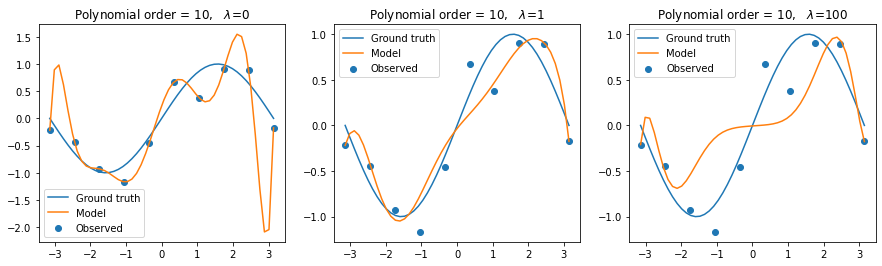

In [3]:
# define order of approximating polynomial 
m = 10

# define range of regularization coefficients
lambda_values = [0, 1, 100]

plt.figure(figsize=(15, 4))
for i, lmbda in enumerate(lambda_values):
    # define matrix X 
    X = np.zeros([n, m])
    for j in range(m):
        X[:, j] = x_obs**j

    # solve for regression coefficients 
    w_solved = np.linalg.inv(X.T @ X + lmbda*np.eye(m)) @ X.T @ y_obs

    # make predictions for new values of the input x 
    X_pred = np.zeros([len(x), m])
    for j in range(m):
        X_pred[:, j] = x**j
    y_pred = X_pred@w_solved

    # compare to ground truth
    plt.subplot(1, 3, i+1)
    plt.plot(x, y_true, label="Ground truth")
    plt.scatter(x_obs, y_obs, label="Observed")
    plt.plot(x, y_pred, label="Model")
    plt.legend()
    plt.title(f"Polynomial order = {m},   $\lambda$={lmbda}")
plt.show()

Adding the regularization penalty greatly reduced overfitting, but adding too much regularization can once again lead to underfitting. 